<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78

In [ ]:
# Libraries to read and manipulate data
import pandas as pd
import numpy as np

#Libraries for Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Library to standardize data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Importing fuctions to build models

import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense,Dropout

#importing SMOTE
from imblearn.over_sampling import SMOTE

#importing metrics

from sklearn.metrics import confusion_matrix, roc_curve, classification_report, recall_score

#library to use seed values
import random

# Library to avoid warning
import warnings
warnings.filterwarnings("ignore")



## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ds = pd.read_csv("/content/drive/MyDrive/bank-1.csv")

## Data Overview

### View the first and last 5 rows of the dataset.

In [ ]:
# First 5 rows
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Last 5 rows
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understanding the shape the dataset.

In [ ]:
ds.shape

(10000, 14)

### Checking the types of columns in the dataset.

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Checking the statistical summary

In [ ]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Checking for missing values

In [ ]:
ds.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


### Check for unique values for each column and drop te required columns

In [ ]:
ds.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [ ]:
#Drop Row Number, Customer ID and Surname as they do not add value to the model building and have the highest unique values

In [ ]:
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Numeric Variable - CreditScore, Age, Balance and Estimated Salary

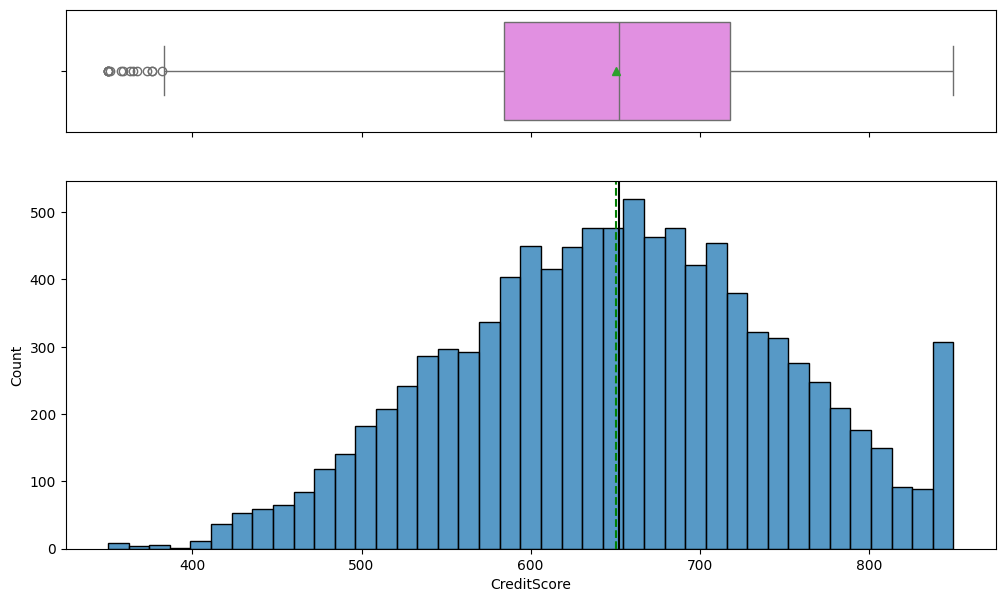

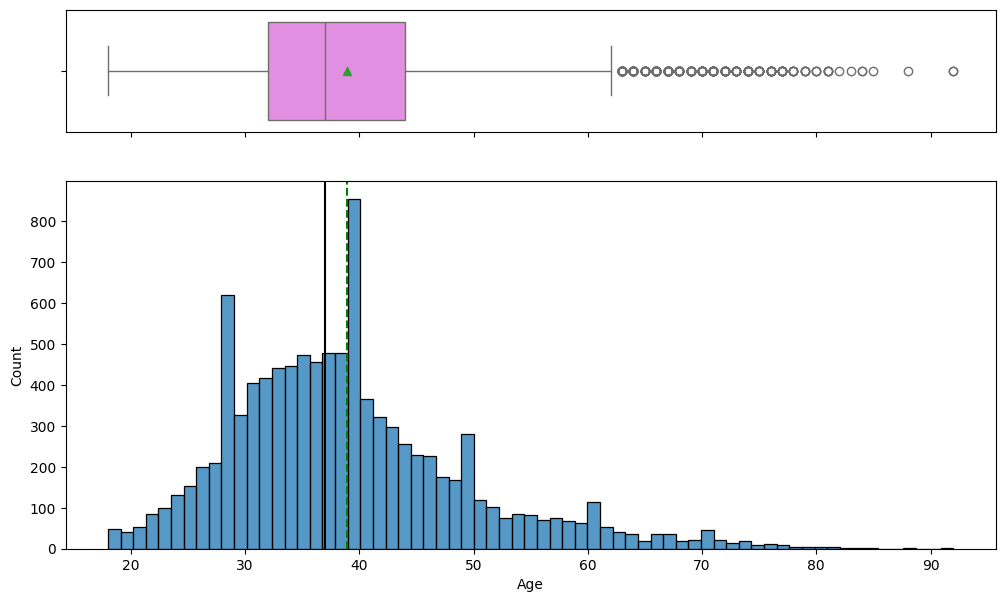

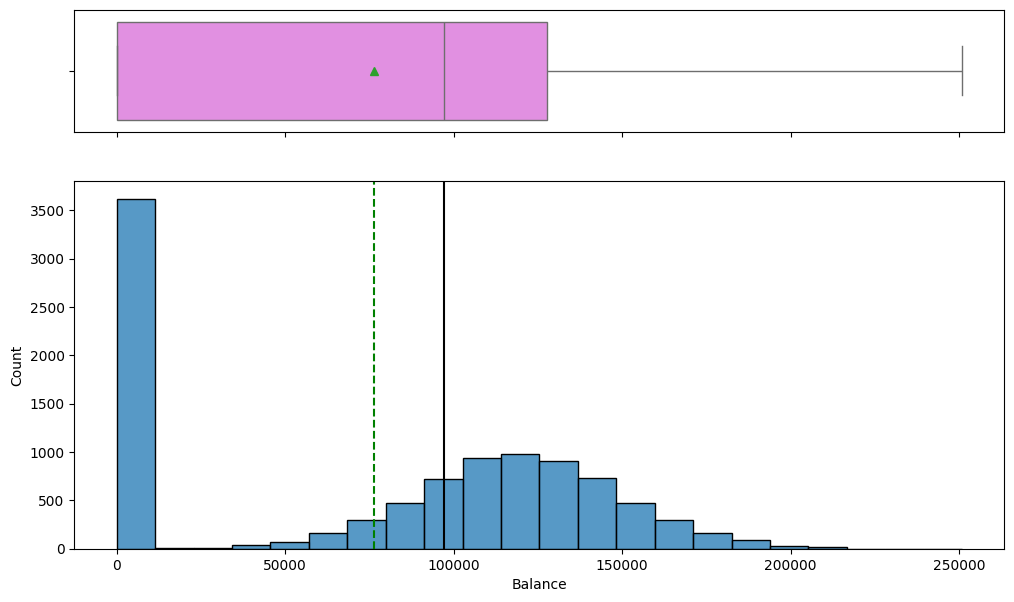

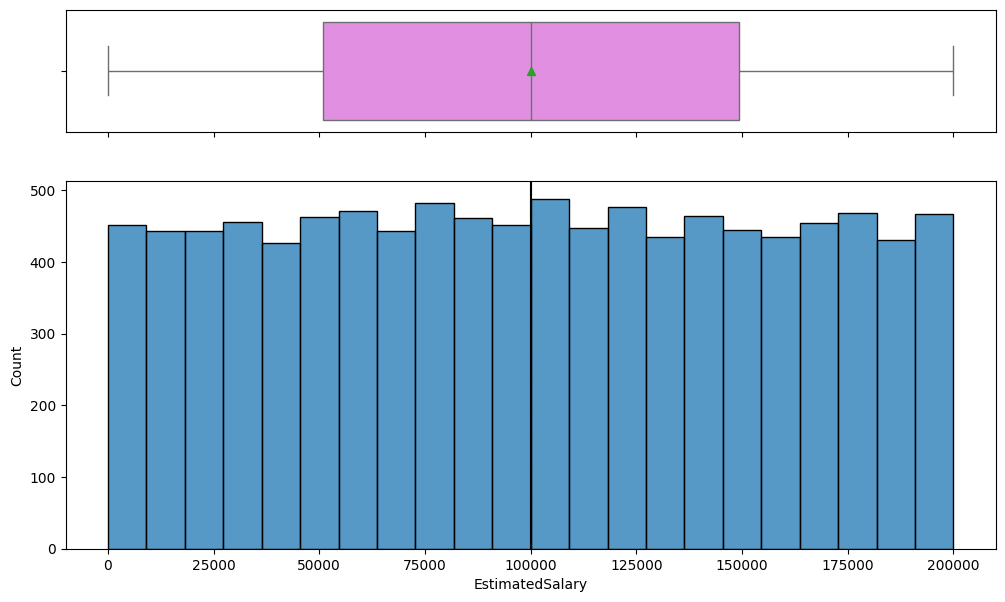

In [ ]:
histogram_boxplot(ds,'CreditScore')
histogram_boxplot(ds,'Age')
histogram_boxplot(ds,'Balance')
histogram_boxplot(ds,'EstimatedSalary')


**Observations:**

Credit Score: The mean and median coincide as per the box plot, yet there are some outliers near beyond the left whisker. The outliers are consistent with the data and they do not require elimination.

Age: The distribution is right skewed with a number of outliers beyond the right whisker, yet the outliers seem consistent with the data and they do not require elimination.

Balance: The box plot shows right skeweness and no outliers, yet the histogram plot is not visually clear, hence we will plot it separatly for better analysis.

Estimated Salary: The box plot shows a normal distribution as the mean and median coincide and the whiskers are of approximatly the same length. The histogram is not visually clear for analysis.

In [ ]:
#EDA for Categorical Variables - Exited, Geography, Gender, Tenure, No. of Products, HAs Credit Card, Active Member

In [ ]:
# funtcion to plot labelled barplot
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

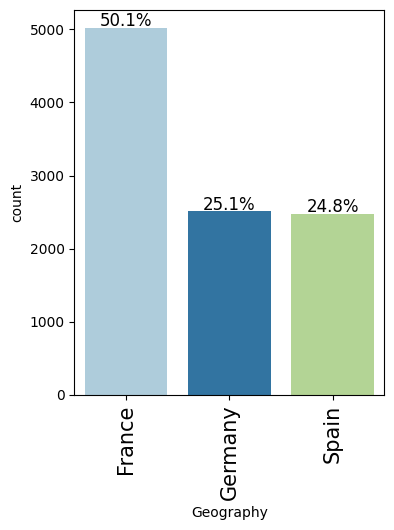

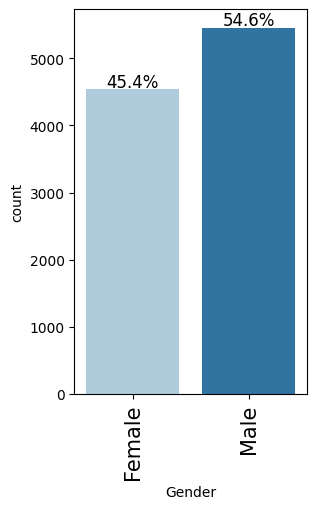

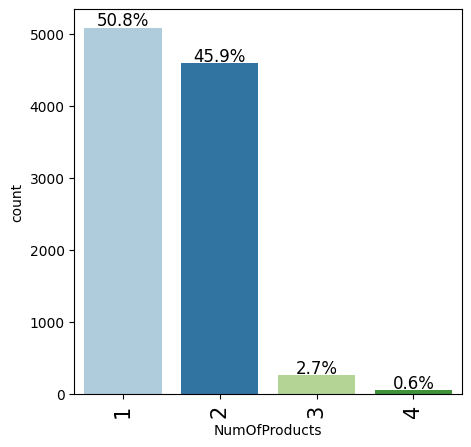

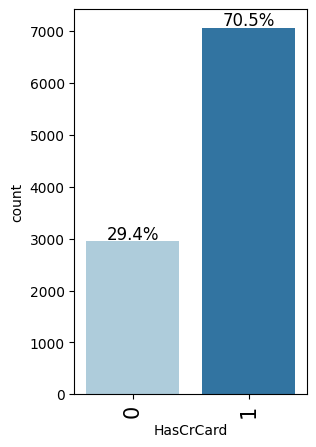

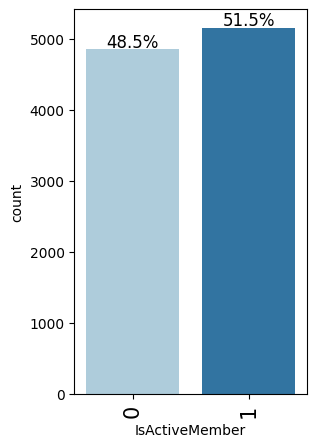

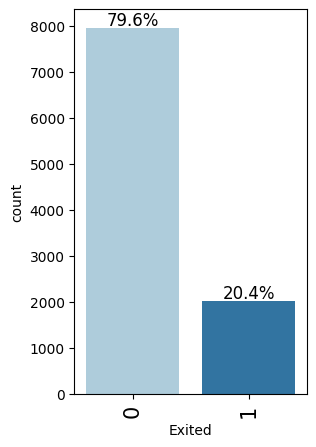

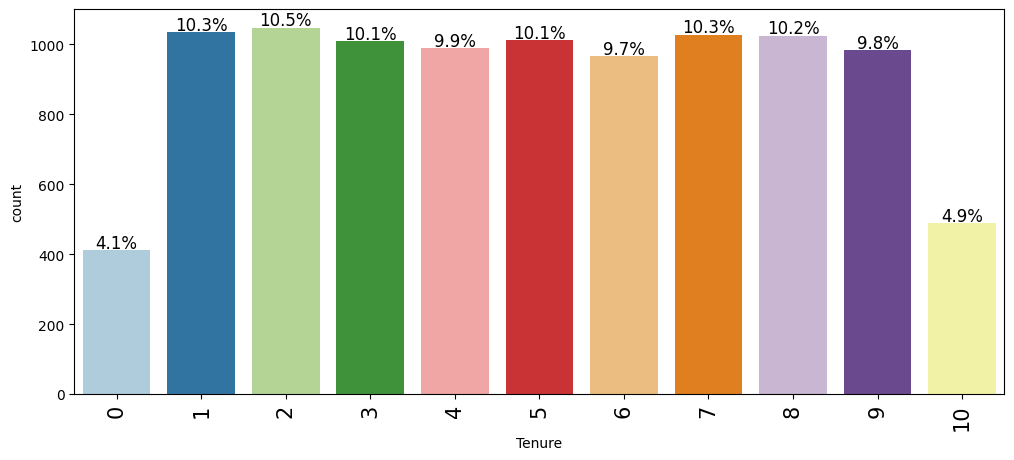

In [ ]:
# create a list of categorical columns
categorical = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','Exited', 'Tenure']

# ploting the categorical variables
for i in categorical:
    labeled_barplot(ds, i, perc=True)

**Observations:**

Geography: 50% of the customers are from France, 25% from Germany and 25% from Spain.

Gender: Almost 55% of the customers are males and the remaining are females.

NumOfProducts: 50% of the customers utilize only 1 product, approximately 46% utilize 2 products and the remaining 3.3% utilize 3-4 products.

HasCrCard: The majority of customers (70%) have credit cards

IsActiveMember: Almost half the customers are active and have are not, yet slightly more customers are active.

Exited: Approx. 20% of the customers exited and 80% did not exit. This shows that the target variable classes are unbalanced and requires attention prior modelling.

Tenure: There are about 10% of folks in each category for tenure from 1 year to 9 years. There are customers less than 5% who have tenure of either less 1 year or 10 years or more.

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

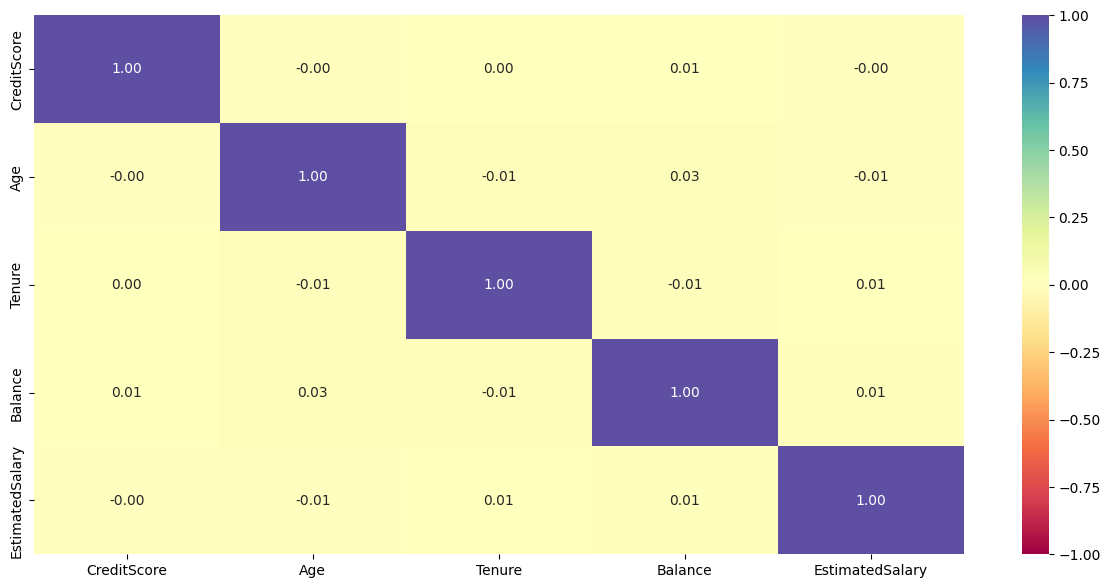

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observation:**

Heat map do not show any correlation between variables.

#### Using Pair Plot for Bi-variate analysis between various variables and target variable

<Figure size 1500x1500 with 0 Axes>

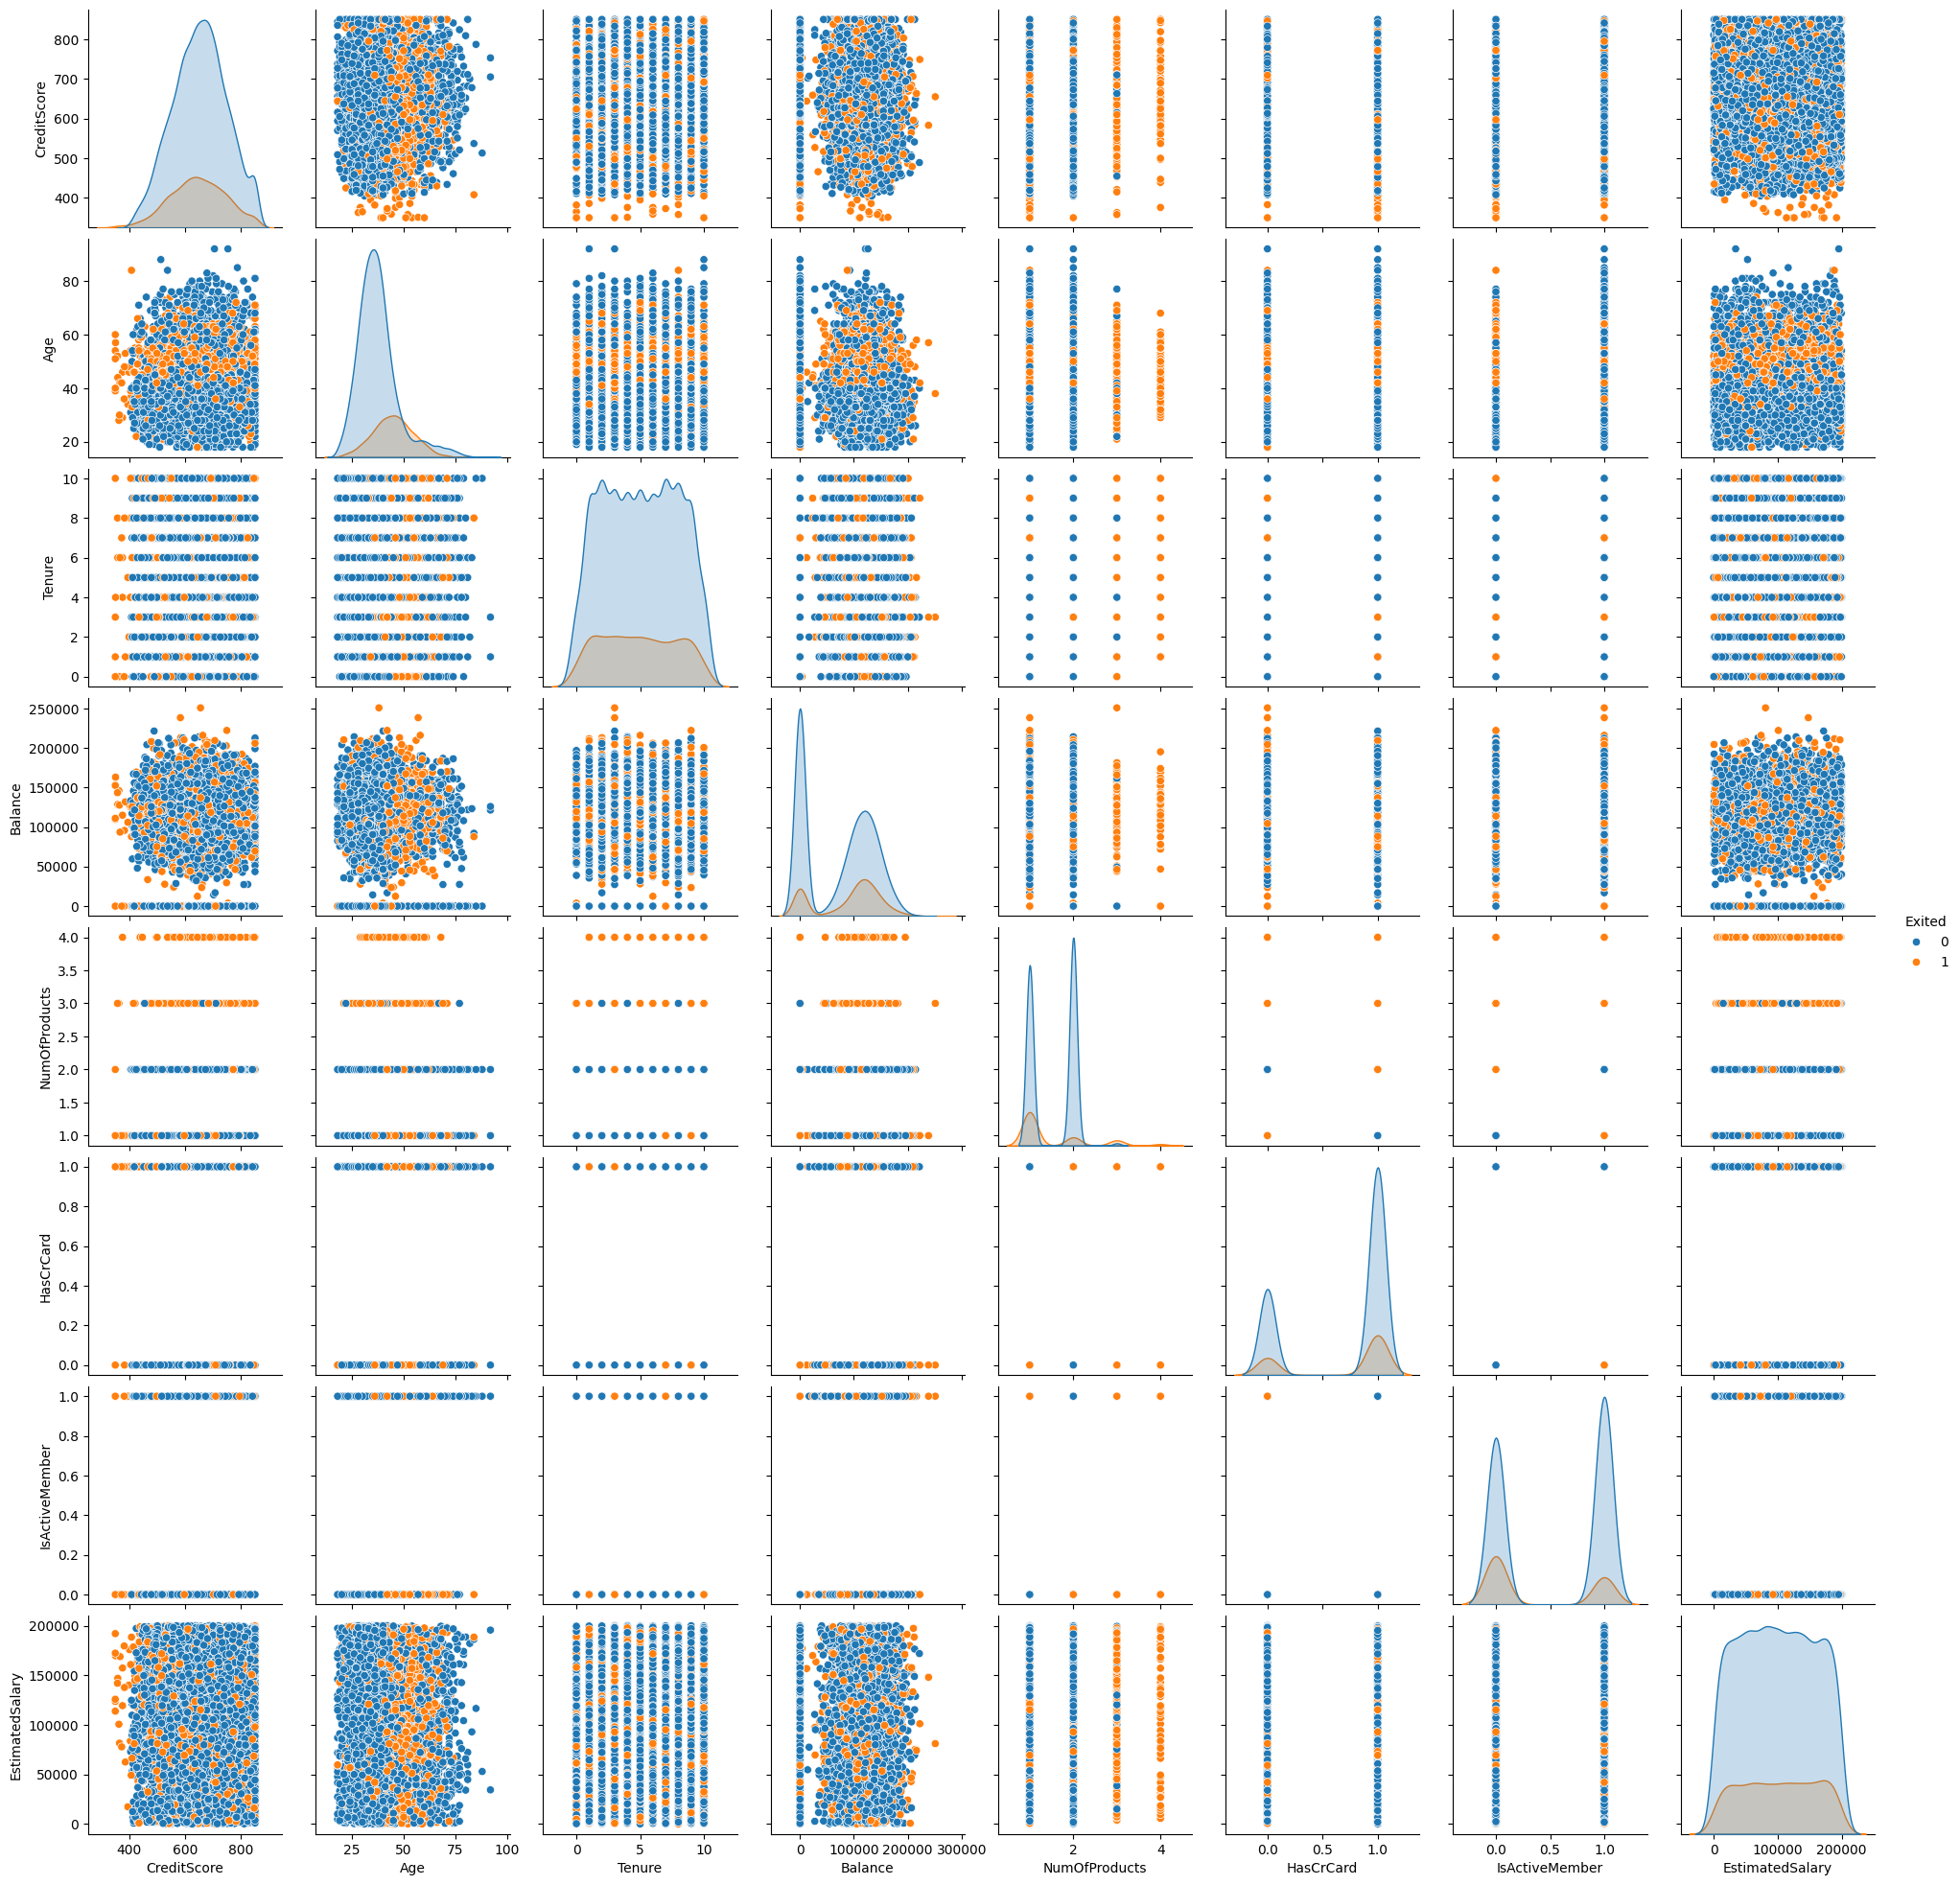

In [ ]:
plt.figure(figsize=(15,15))
sns.pairplot(ds, hue="Exited",diag_kind='kde')

**Observation :**

pair plot do not show any correlation between variables.

The Exited and non-exited customers are present in all clusters, and as the classes are unbalanced, the non-exited customers are much less.

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
ds = ds.astype(float)
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Train-validation-test Split

In [ ]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(6400, 11) (1600, 11) (2000, 11)


In [ ]:
print(y_train.shape, y_val.shape, y_test.shape)

(6400,) (1600,) (2000,)


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [ ]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

Model can make wrong predictions as:

Predicting a customer is exiting and the customer is not exiting (False Positive - FP)
Predicting a customer is not exiting and customer is exiting (False Negative - FN)

Which case is more important?

False Negatives (FN) are worse - predicting that customer is not exiting but he/she is exiting.
It might cause loss to the bank because the bank will not offer these misidentified customers any initiative to retain their business.
How to reduce this loss i.e need to reduce False Negative?

Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing FN. Hence, the focus should be on increasing Recall or minimizing the FN or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.


In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [ ]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Adding a hidden layer with 32 neurons and relu as activation function
model_0.add(Dense(32, activation='relu'))
# Add the output layer with the number of neurons required.
model_0.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

metric = 'accuracy'
metric = keras.metrics.Recall()
metric = keras.metrics.Precision()
metric = keras.metrics.F1Score()

In [ ]:
# Compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the ANN

history_0 = model_0.fit(
    X_train, y_train,
    batch_size= 32,
    validation_data=(X_val,y_val),
    epochs= 50,
    verbose=1
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - f1_score: 0.3466 - loss: 0.6360 - val_f1_score: 0.3385 - val_loss: 0.5794
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.3466 - loss: 0.5747 - val_f1_score: 0.3385 - val_loss: 0.5425
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.3466 - loss: 0.5430 - val_f1_score: 0.3385 - val_loss: 0.5224
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.3466 - loss: 0.5255 - val_f1_score: 0.3385 - val_loss: 0.5106
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.3466 - loss: 0.5150 - val_f1_score: 0.3385 - val_loss: 0.5029
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.3466 - loss: 0.5078 - val_f1_score: 0.3385 - val_loss: 0.4974
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.3466 - loss: 0.5024 - val_f1_score: 0.3385 - val_loss: 0.4931
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.3466 - loss: 0.4979 - val_f1_score: 0.

#### Loss Function

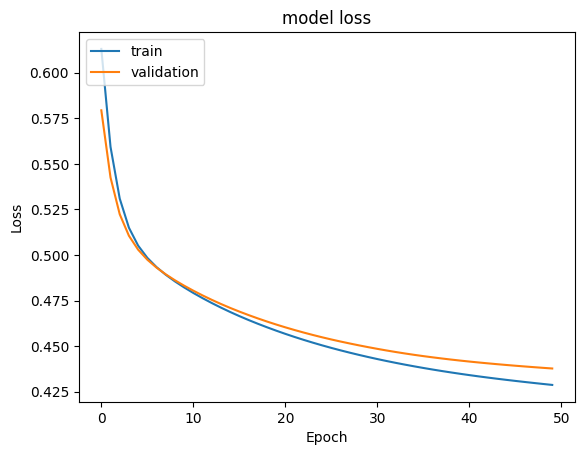

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using 0.5 as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as a threshold
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

#### Classification Report

In [ ]:
#classification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      5096
         1.0       0.65      0.13      0.21      1304

    accuracy                           0.81      6400
   macro avg       0.73      0.56      0.55      6400
weighted avg       0.78      0.81      0.75      6400



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      1274
         1.0       0.58      0.09      0.15       326

    accuracy                           0.80      1600
   macro avg       0.69      0.54      0.52      1600
weighted avg       0.76      0.80      0.74      1600



The Recall of this model is only 9% which is not the best. Let us optimize the model to use Adam Optimizer

#### Confusion Matrix

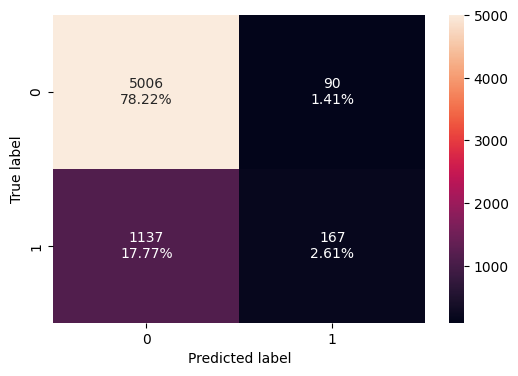

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

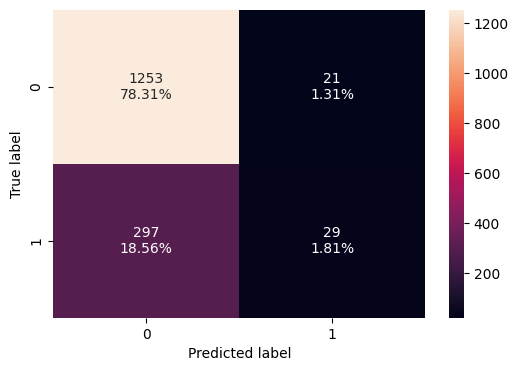

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

The above confusion matrix also indicates that the model is overfitting

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_1 = Sequential()
# Adding an input layer with 64 neurons and Relu as activation function
model_1.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
# Adding an input layer with 32 neurons and Relu as activation function
model_1.add(Dense(32,activation='relu'))
#Adding an output layer with 1 neuron and Sigmoid as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

metric = 'accuracy'
metric = keras.metrics.Recall()
metric = keras.metrics.Precision()
metric = keras.metrics.F1Score()

In [ ]:
# Compile the model with binary cross entropy as loss function and recall as the metric.
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size= 32,
    validation_data=(X_val,y_val),
    epochs= 50,
    verbose=1
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - f1_score: 0.3466 - loss: 0.5306 - val_f1_score: 0.3385 - val_loss: 0.4273
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.3466 - loss: 0.4168 - val_f1_score: 0.3385 - val_loss: 0.4156
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.3466 - loss: 0.4000 - val_f1_score: 0.3385 - val_loss: 0.4040
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.3466 - loss: 0.3857 - val_f1_score: 0.3385 - val_loss: 0.3928
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.3466 - loss: 0.3736 - val_f1_score: 0.3385 - val_loss: 0.3835
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.3466 - loss: 0.3636 - val_f1_score: 0.3385 - val_loss: 0.3762
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.3466 - loss: 0.3557 - val_f1_score: 0.3385 - val_loss: 0.3699
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.3466 - loss: 0.3488 - val_f1_score: 0.

#### Loss Function

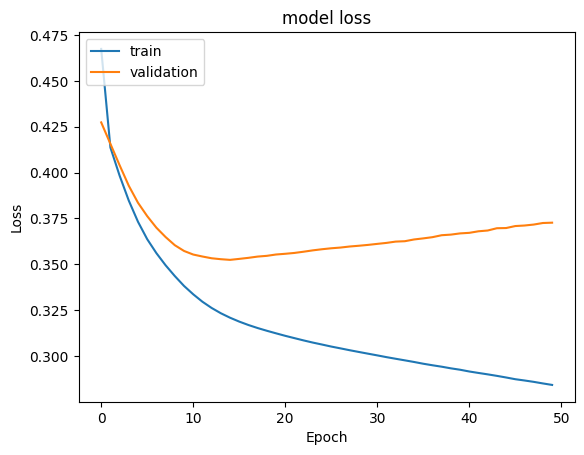

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#### Classification Report

In [ ]:
# Classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      5096
         1.0       0.82      0.54      0.66      1304

    accuracy                           0.88      6400
   macro avg       0.86      0.76      0.79      6400
weighted avg       0.88      0.88      0.87      6400



In [ ]:
#classification report
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1274
         1.0       0.73      0.42      0.53       326

    accuracy                           0.85      1600
   macro avg       0.80      0.69      0.72      1600
weighted avg       0.84      0.85      0.83      1600



While the recall is slightly better than the last model, it still indicates overfitting and needs further tuning. The loss has to be minimized further for convergence. We will now move on to introducting regularization through dropouts for NN with Adam Optimizer

#### Confusion Matrix

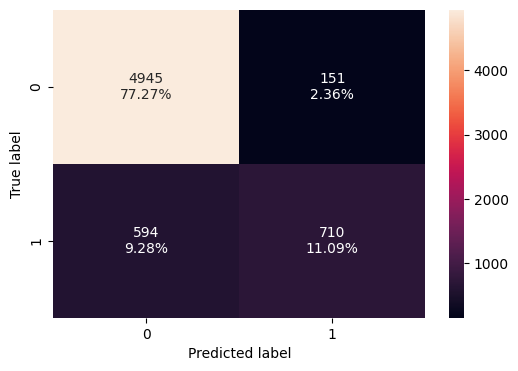

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

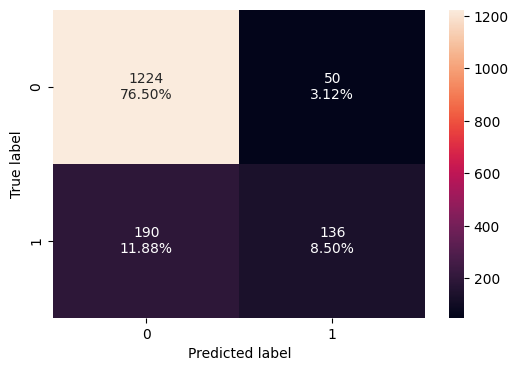

In [ ]:
#Calculating the confusion matrix for validation set
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Adam Optimizer and Dropout

For the next model, we will use 3 hidden layers, with 100 epochs and batch size of 32. We are going to use the drop out rates of 0.2 and 0.1.

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Adding dropout with ratio of 0.2
model_2.add(Dropout(0.2))
# Adding a hidden layer of 32 neurons and relu activation function
model_2.add(Dense(32,activation='relu'))
# Adding a hidden layer of 16 neurons and relu activation function
model_2.add(Dense(16,activation='relu'))
# Adding dropout with ratio of 0.1
model_2.add(Dropout(0.1))
# Adding a hidden layer of 16 neurons and relu activation function
model_2.add(Dense(16,activation='relu'))
# Adding output layer with 1 neuron required in the output layer with sigmoid activation function.
model_2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Adding Adam Optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

metric = 'accuracy'
metric = keras.metrics.Recall()
metric = keras.metrics.Precision()
metric = keras.metrics.F1Score()

In [ ]:
## Binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
# Summary of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257 (8.82 KB)

 Trainable params: 2,257 (8.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - f1_score: 0.3466 - loss: 0.5332 - val_f1_score: 0.3385 - val_loss: 0.4425
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.3466 - loss: 0.4447 - val_f1_score: 0.3385 - val_loss: 0.4320
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - f1_score: 0.3466 - loss: 0.4345 - val_f1_score: 0.3385 - val_loss: 0.4242
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.3466 - loss: 0.4229 - val_f1_score: 0.3385 - val_loss: 0.4139
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.3466 - loss: 0.4131 - val_f1_score: 0.3385 - val_loss: 0.4098
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.3466 - loss: 0.4135 - val_f1_score: 0.3385 - val_loss: 0.4064
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.3466 - loss: 0.4100 - val_f1_score: 0.3385 - val_loss: 0.4040
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.3466 - loss: 0.4026 - val_f1_s

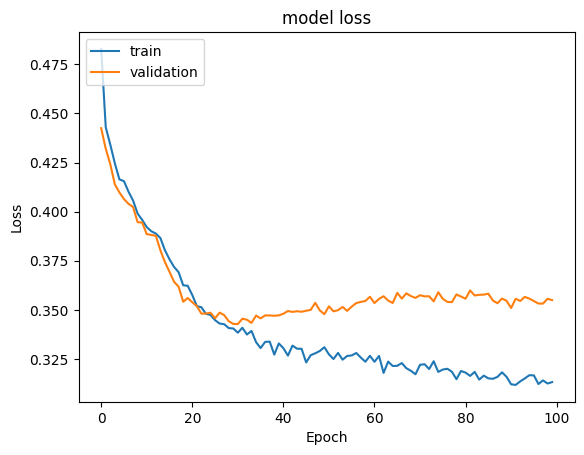

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using 0.5 as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#### Classification Report and Confusion Matrix

In [ ]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      5096
         1.0       0.84      0.53      0.65      1304

    accuracy                           0.88      6400
   macro avg       0.86      0.75      0.79      6400
weighted avg       0.88      0.88      0.87      6400



In [ ]:
#classification report
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1274
         1.0       0.75      0.47      0.57       326

    accuracy                           0.86      1600
   macro avg       0.81      0.71      0.74      1600
weighted avg       0.85      0.86      0.85      1600



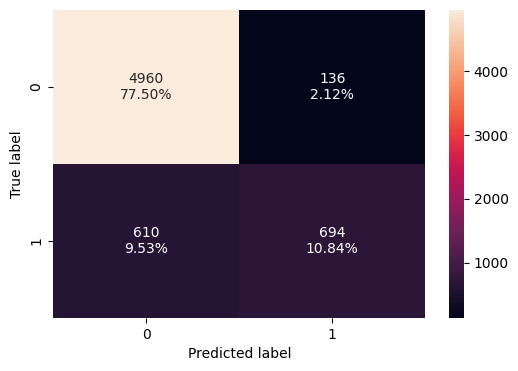

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

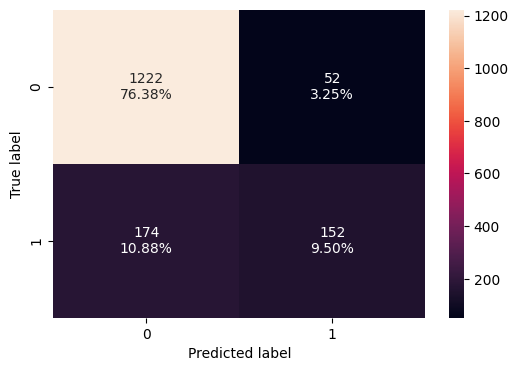

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

From the above metric it is evident that the model overfitting problem has been taken care of and now the model is showcasing signs of underfitting

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
# Applying SMOTE and tuning further

sm  = SMOTE(random_state=42)
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))



After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [ ]:
#Initializing the model
model_3 = Sequential()
#Input layer with 32 neurons and Relu activation function
model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Hidden layer with 16 neurons and relu activation function
model_3.add(Dense(16,activation='relu'))
#Hidden layer with 16 neurons and relu activation function
model_3.add(Dense(16,activation='relu'))
# 1 neuron in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Optimizer used is SGD
optimizer = tf.keras.optimizers.SGD(0.001)

metric = 'accuracy'
metric = keras.metrics.Recall()
metric = keras.metrics.Precision()
metric = keras.metrics.F1Score()

In [ ]:
# using binary cross entropy as the loss function
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
# Model Summary
model_3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN with batch size 32 and epochs 100
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - f1_score: 0.6656 - loss: 0.7608 - val_f1_score: 0.3385 - val_loss: 0.8251
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - f1_score: 0.6656 - loss: 0.7068 - val_f1_score: 0.3385 - val_loss: 0.7441
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6656 - loss: 0.6850 - val_f1_score: 0.3385 - val_loss: 0.6987
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6656 - loss: 0.6731 - val_f1_score: 0.3385 - val_loss: 0.6708
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6656 - loss: 0.6650 - val_f1_score: 0.3385 - val_loss: 0.6529
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6656 - loss: 0.6582 - val_f1_score: 0.3385 - val_loss: 0.6405
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6656 - loss: 0.6521 - val_f1_score: 0.3385 - val_loss: 0.6309
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6656 - loss: 0.6459 - val_f1_s

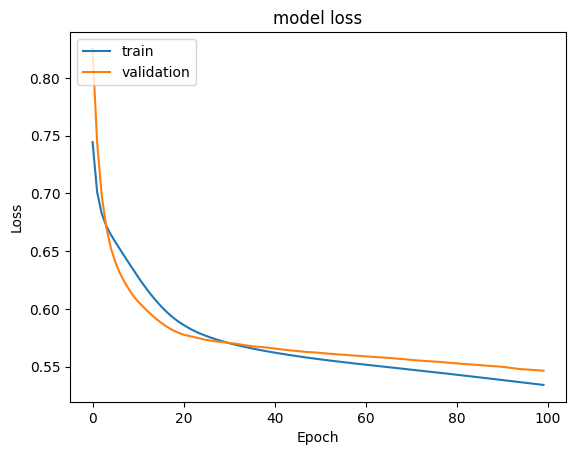

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#### Classification Report and Confusion Matrix

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.74      0.71      0.73      5096
         1.0       0.72      0.75      0.74      5096

    accuracy                           0.73     10192
   macro avg       0.73      0.73      0.73     10192
weighted avg       0.73      0.73      0.73     10192



In [ ]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.71      0.80      1274
         1.0       0.39      0.72      0.51       326

    accuracy                           0.71      1600
   macro avg       0.65      0.72      0.65      1600
weighted avg       0.80      0.71      0.74      1600



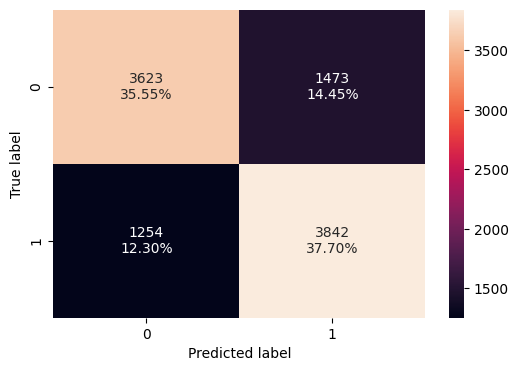

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

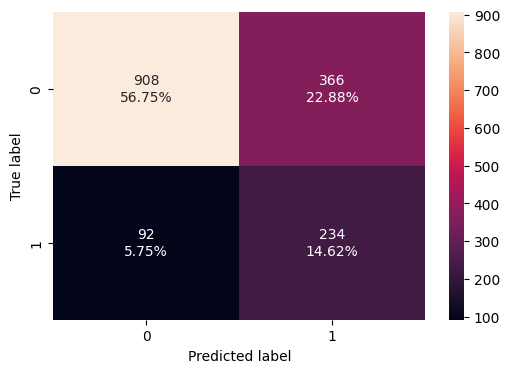

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

By applying SMOTE to the training data set, we see better convergence, But becuase we used SGD the accuracy of the model has gone down. In comparison to the model 0 with SGD optimizer, this neural net seems to have eliminated overfitting and has close accuracy score when comparing training and validation sets.

We now move on to see if the Balanced Training set and optimizer as Adam has any effect on the accuracy in the classification report.

For the sake of easy comparison, we have maintained similar layers for SDG and Adam with SMOTE training set

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Repeating the model 3 but with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_4 = Sequential()
#Adding 32 neurons with relu activation
model_4.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Adding 16 neurons to hidden layer with relu activation
model_4.add(Dense(16,activation='relu'))
#Adding 16 neurons to hidden layer with relu activation
model_4.add(Dense(16,activation='relu'))
# Adding 1 neuron to the output layer with sigmoid activation function
model_4.add(Dense(1, activation = 'relu'))

In [ ]:
# model summary
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

metric = 'accuracy'
metric = keras.metrics.Recall()
metric = keras.metrics.Precision()
metric = keras.metrics.F1Score()

In [ ]:
#using binary cross entropy as the loss function
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
#Fitting the ANN with batch size 32 and epochs 100

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size= 32,
    epochs= 100,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - f1_score: 0.6539 - loss: 1.1745 - val_f1_score: 0.3385 - val_loss: 0.6213
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - f1_score: 0.6660 - loss: 0.6159 - val_f1_score: 0.3385 - val_loss: 0.6257
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6663 - loss: 0.5959 - val_f1_score: 0.3410 - val_loss: 0.5554
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6697 - loss: 0.5539 - val_f1_score: 0.3439 - val_loss: 0.5829
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - f1_score: 0.6760 - loss: 0.5275 - val_f1_score: 0.3495 - val_loss: 0.5685
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - f1_score: 0.6836 - loss: 0.5113 - val_f1_score: 0.3510 - val_loss: 0.5644
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6781 - loss: 0.4987 - val_f1_score: 0.3535 - val_loss: 0.5446
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6864 - loss: 0.4875 - val_f1_s

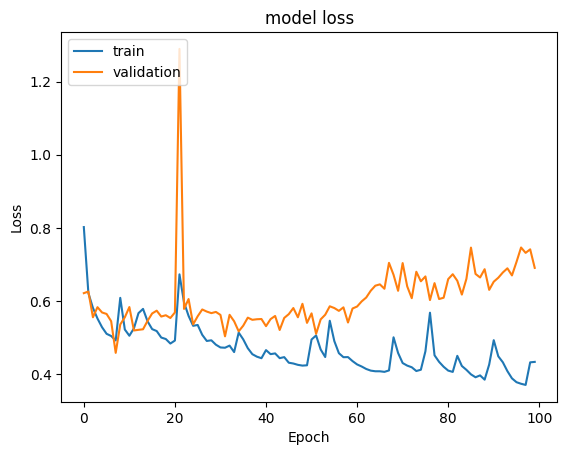

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#### Classification Report and Confusion Matrix

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      5096
         1.0       0.82      0.83      0.82      5096

    accuracy                           0.82     10192
   macro avg       0.82      0.82      0.82     10192
weighted avg       0.82      0.82      0.82     10192



In [ ]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85      1274
         1.0       0.46      0.67      0.55       326

    accuracy                           0.78      1600
   macro avg       0.68      0.74      0.70      1600
weighted avg       0.82      0.78      0.79      1600



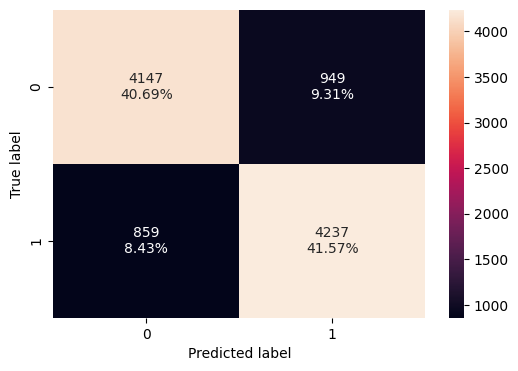

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

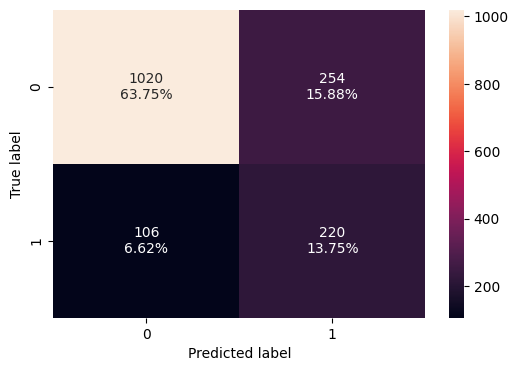

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

While we would assume that Adam optmizer is better than SGD, with Balanced Training data, we have seen the opposite.

The training model accuracy's are much higher in Adam optimizer than the validation set. We also observed a spike in the chart that is between loss and val loss. This indicates presence of noise and convergence that is probably still sub optimal.

With the SGD as optimizer and balanced training data set, though the accuracy was still 73% and 71% for validation, the loss function seemed to have worked effectively thus minimizing distance between training and validation.

Now let us try to add Drop out to the Adam optimizer with balanced training data and increase the epochs to 200

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

Neural Network with Adam and Dropout rate on Balanced Training data. Epochs to be increased from 100 to 200

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_5 = Sequential()
# input layer with 32 neurons and relu as activation function
model_5.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Drop out rate of 0.2
model_5.add(Dropout(0.2))
# Hidden layer with 16 neurons and relu activation function.
model_5.add(Dense(16,activation='relu'))
# Drop out rate of 0.1
model_5.add(Dropout(0.1))
# Hidden layer with 16 neurons with relu as activation function
model_5.add(Dense(16,activation='relu'))
# 1 neuron in the output layer with a sigmoid activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#model summary
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# using Adam as optimizer and initiatng metrics
optimizer = tf.keras.optimizers.Adam(0.001)

metric = 'accuracy'
metric = keras.metrics.Recall()
metric = keras.metrics.Precision()
metric = keras.metrics.F1Score()

In [ ]:
# using binary cross entropy as loss function
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
# Fitting the ANN with batch size of 32 and epochs as 100

history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - f1_score: 0.6656 - loss: 0.6395 - val_f1_score: 0.3385 - val_loss: 0.5606
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6656 - loss: 0.5775 - val_f1_score: 0.3385 - val_loss: 0.5687
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6656 - loss: 0.5628 - val_f1_score: 0.3385 - val_loss: 0.5719
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6656 - loss: 0.5569 - val_f1_score: 0.3385 - val_loss: 0.5658
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6656 - loss: 0.5441 - val_f1_score: 0.3385 - val_loss: 0.5415
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6656 - loss: 0.5336 - val_f1_score: 0.3385 - val_loss: 0.5340
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6656 - loss: 0.5174 - val_f1_score: 0.3385 - val_loss: 0.5238
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6656 - loss: 0.5096 - val_f1_

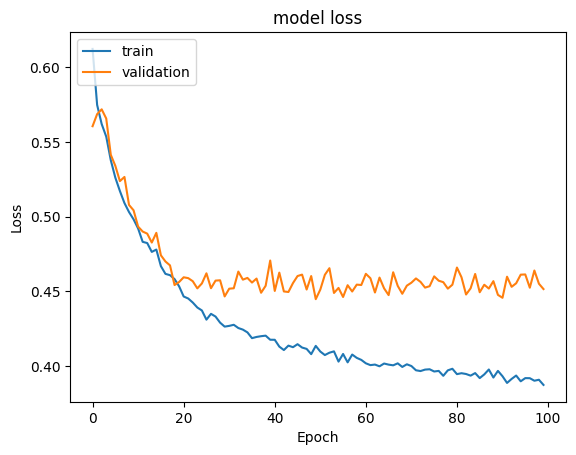

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

#### Classification report and confusion matrix

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85      5096
         1.0       0.85      0.84      0.84      5096

    accuracy                           0.84     10192
   macro avg       0.84      0.84      0.84     10192
weighted avg       0.84      0.84      0.84     10192



In [ ]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87      1274
         1.0       0.52      0.69      0.59       326

    accuracy                           0.81      1600
   macro avg       0.72      0.76      0.73      1600
weighted avg       0.83      0.81      0.82      1600



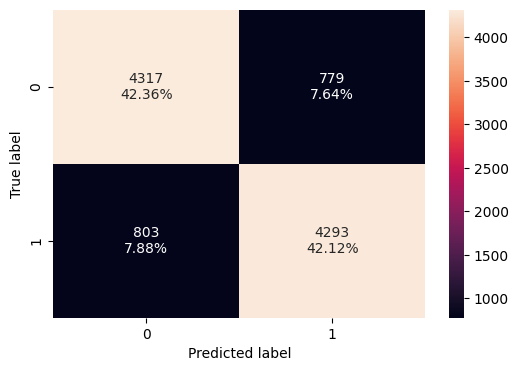

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

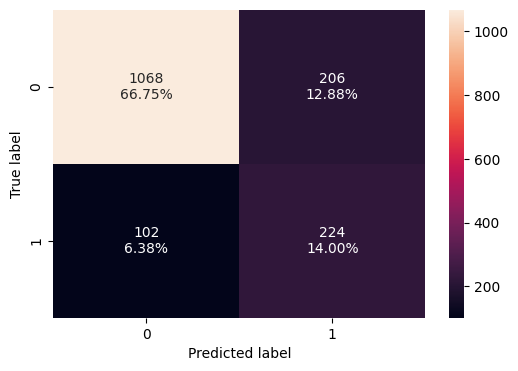

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

The above neural net has given a good accuracy score of 84% for the training set and 81% for the test set.

This is supported by the proof that loss function was effective for the training set but not the test set.

Recall scores are still lower for the test set but is higher on the training set, which did not solve the overfitting problem with dropout regularization.

## Model Performance Comparison and Final Model Selection

In [ ]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.128067
NN with Adam,0.544479
NN with Adam & Dropout,0.532209
NN with SMOTE & SGD,0.753925
NN with SMOTE & Adam,0.831436
"NN with SMOTE,Adam & Dropout",0.842425


In [ ]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.088957
NN with Adam,0.417178
NN with Adam & Dropout,0.466258
NN with SMOTE & SGD,0.717791
NN with SMOTE & Adam,0.674847
"NN with SMOTE,Adam & Dropout",0.687117


In [ ]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.039110
NN with Adam,0.127301
NN with Adam & Dropout,0.065951
NN with SMOTE & SGD,0.036133
NN with SMOTE & Adam,0.156590
"NN with SMOTE,Adam & Dropout",0.155309


As per the recall scores here, the best model is Neural Networks with SMOTE balanced training date with SGD Optimizer.

The accuracy though stayed at 73% for training and 71% for validation, this neural network was able to effectively reduce loss between trainin and validation maximizing recall and thus solving the overfitting and underfitting issues we oberved in several other model.

## Actionable Insights and Business Recommendations

* Would recommend the Neural Model with Balanced Data set and SGD Optimizer
* Customer who have more than 1 product are less likley to churn.
* Customers who have a decent amount of tenure with the bank are less likely to exit.
* Contrary to the belief, longer the customer stays less the churn, we have observed a sharp decline in customers who have stayed more than 9+ years in the bank. It would be required to understand this churn through further survey exit analysis and come up with recommendations accordingly.
* Active customer tend to have less churn than non active customer. We need further incentives and marketng spend to understand what went wrong and what needs strategy realignment
* With more than 20% churn rate, it would be recommended to do further analysis by countries/region.






<font size=6 color='blue'>Power Ahead</font>
___